### Take four models of polynomials of degree (2, 3, 4, 5), and use the normal equation to optimize theta (with small lambda term, as shown in class). Split the weather data using (80:20) split, print train, and test loss for each model. Write which model you consider best based on train and test loss along with proper explanation.


normal equation = \[
(X^T X) \theta - (X^T y)
\]


In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
models=[2,3,4,5]

In [3]:
#loading data
data=xr.open_dataset(r"C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IISERB docs\workshoop assignments\PERCDR_0.25deg_2001_2010_precipitation_data.nc")
df=data.to_dataframe().reset_index()
df
#data

,datetime,lon,lat,crs,precip
0,2001-01-01,77.00,31.50,1,4.00
1,2001-01-01,77.00,31.25,1,5.91
2,2001-01-01,77.00,31.00,1,4.48
3,2001-01-01,77.00,30.75,1,4.40
4,2001-01-01,77.00,30.50,1,5.16
...,...,...,...,...,...
759611,2010-12-31,80.75,29.50,1,4.67
759612,2010-12-31,80.75,29.25,1,3.78
759613,2010-12-31,80.75,29.00,1,2.20
759614,2010-12-31,80.75,28.75,1,1.93


In [4]:
col=df.columns
col
y=df[['precip']].values
y
scale=StandardScaler()

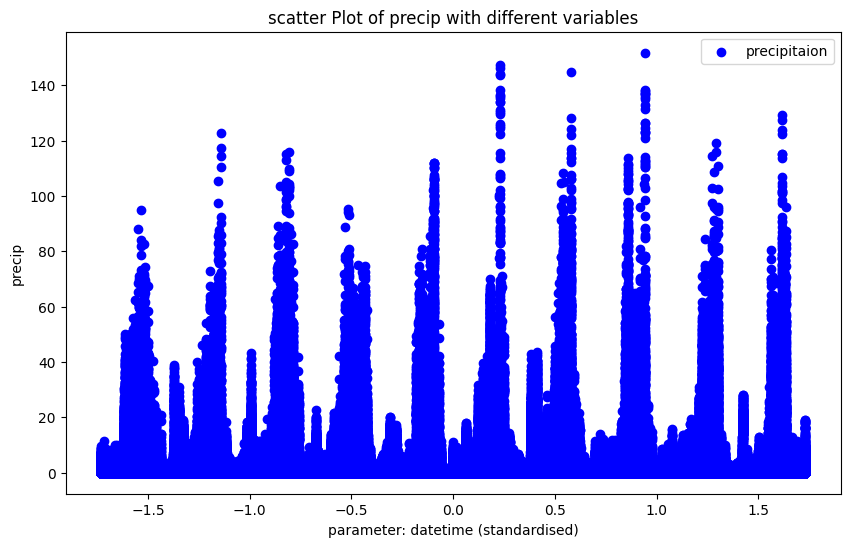

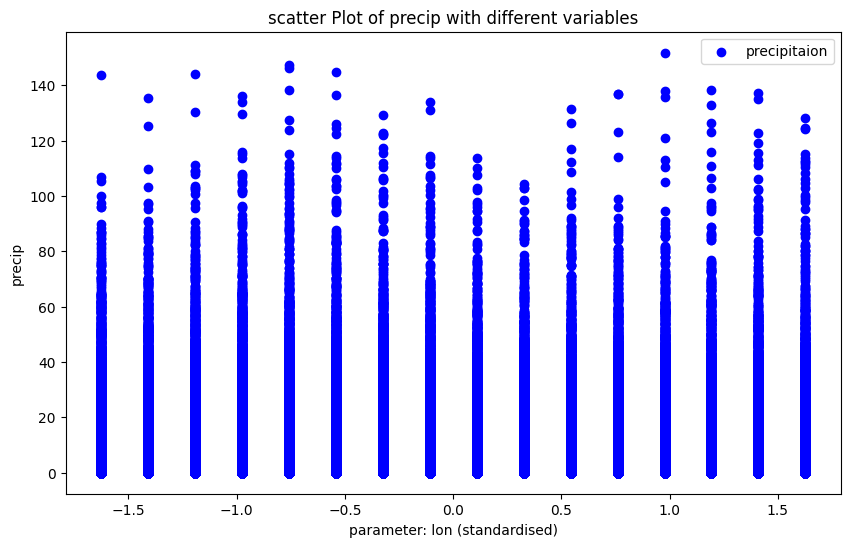

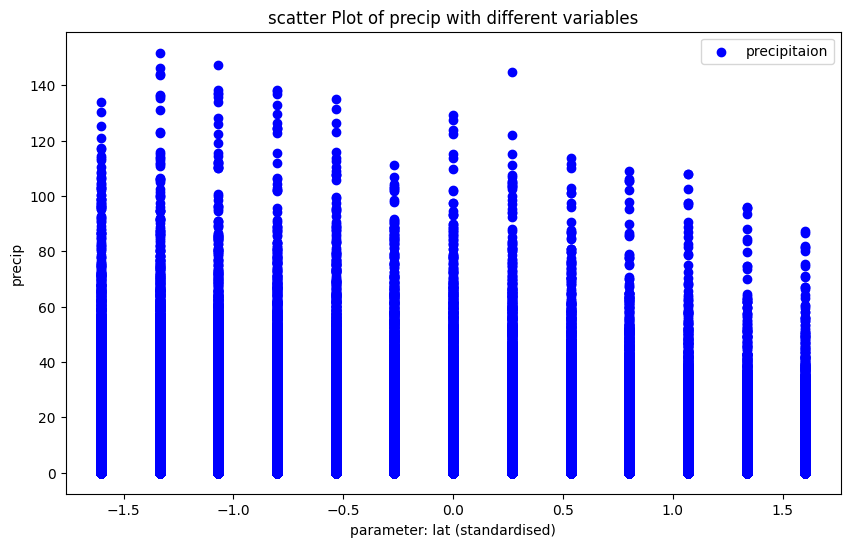

In [5]:
for x in col[:len(col)-2]:
    X_reshaped = df[x].values.reshape(-1, 1)
    X_scaled = scale.fit_transform(X_reshaped)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled, y, color='blue', label='precipitaion')
    plt.xlabel(f'parameter: {x} (standardised)')
    plt.ylabel('precip')
    plt.title('scatter Plot of precip with different variables')
    plt.legend()
    plt.show()


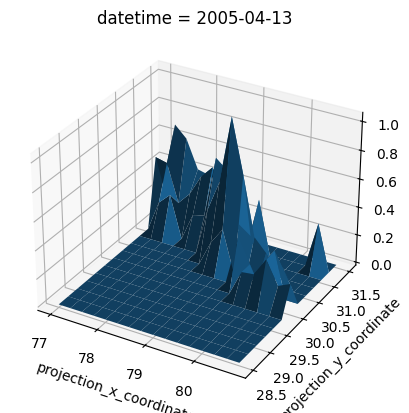

In [6]:
data['precip'][1563,:,:].plot.surface()

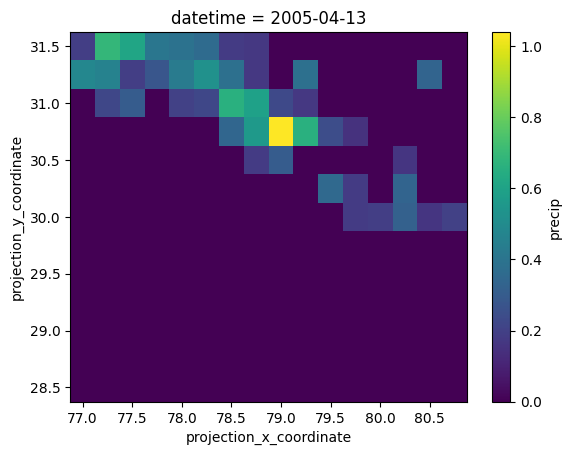

In [7]:
data['precip'][1563,:,:].plot()

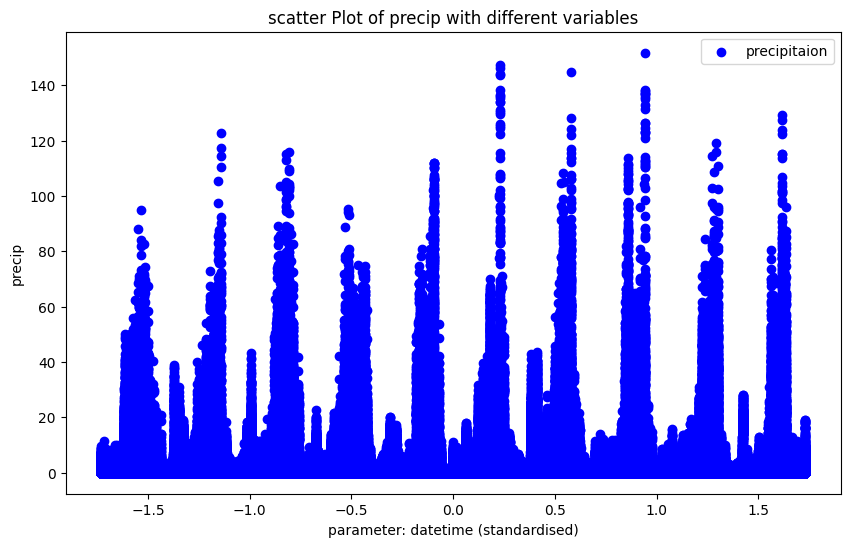

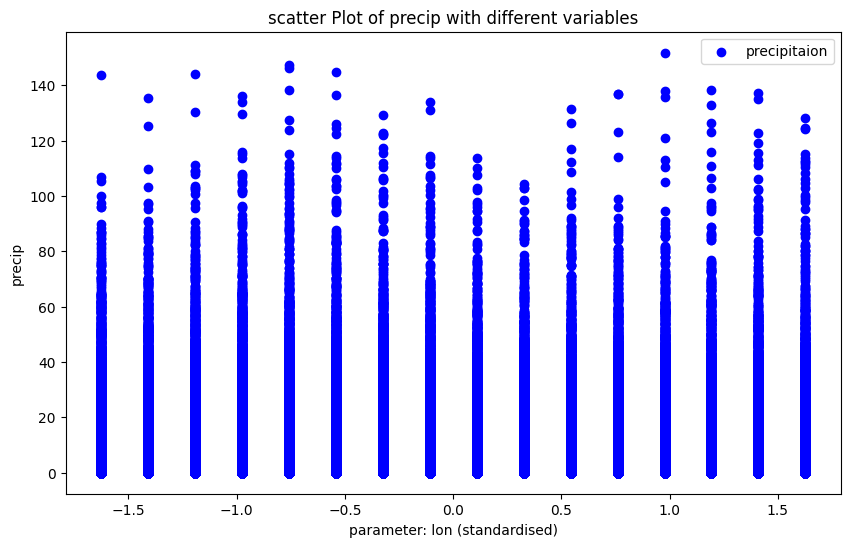

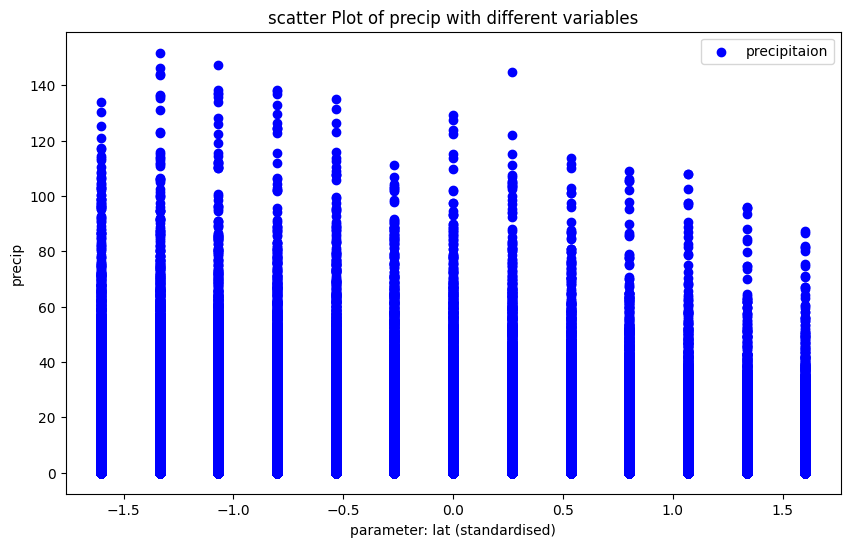

In [8]:
for x in col[:len(col)-2]:
    X_reshaped = df[x].values.reshape(-1, 1)
    X_scaled = scale.fit_transform(X_reshaped)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled, y, color='blue', label='precipitaion')
    plt.xlabel(f'parameter: {x} (standardised)')
    plt.ylabel('precip')
    plt.title('scatter Plot of precip with different variables')
    plt.legend()
    plt.show()


date alone is a suffficient parameter to make predicitons from the  model, because that parameter is only showing significant changes.

In [9]:
#splittiing up the datetime column in day, month, year
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

order=['day','month','year','precip']
df_modified=df[order]
df_modified

,day,month,year,precip
0,1,1,2001,4.00
1,1,1,2001,5.91
2,1,1,2001,4.48
3,1,1,2001,4.40
4,1,1,2001,5.16
...,...,...,...,...
759611,31,12,2010,4.67
759612,31,12,2010,3.78
759613,31,12,2010,2.20
759614,31,12,2010,1.93


In [22]:
df

,datetime,lon,lat,crs,precip,day,month,year
0,2001-01-01,77.00,31.50,1,4.00,1,1,2001
1,2001-01-01,77.00,31.25,1,5.91,1,1,2001
2,2001-01-01,77.00,31.00,1,4.48,1,1,2001
3,2001-01-01,77.00,30.75,1,4.40,1,1,2001
4,2001-01-01,77.00,30.50,1,5.16,1,1,2001
...,...,...,...,...,...,...,...,...
759611,2010-12-31,80.75,29.50,1,4.67,31,12,2010
759612,2010-12-31,80.75,29.25,1,3.78,31,12,2010
759613,2010-12-31,80.75,29.00,1,2.20,31,12,2010
759614,2010-12-31,80.75,28.75,1,1.93,31,12,2010


In [19]:
feature=order[:len(order)-1]
x=df_modified[feature]
y=df_modified[order[len(order)-1]]
#splitting the data using scikit learn so as to introduce some randomness in the data as well.
# Split the data into training and test sets, using inbuilt command
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train=np.array(X_train)
X_test=np.array(X_test)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(x)

C:\Users\vvagh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [20]:
x.shape

(759616, 3)

In [21]:
y.shape

(759616,)

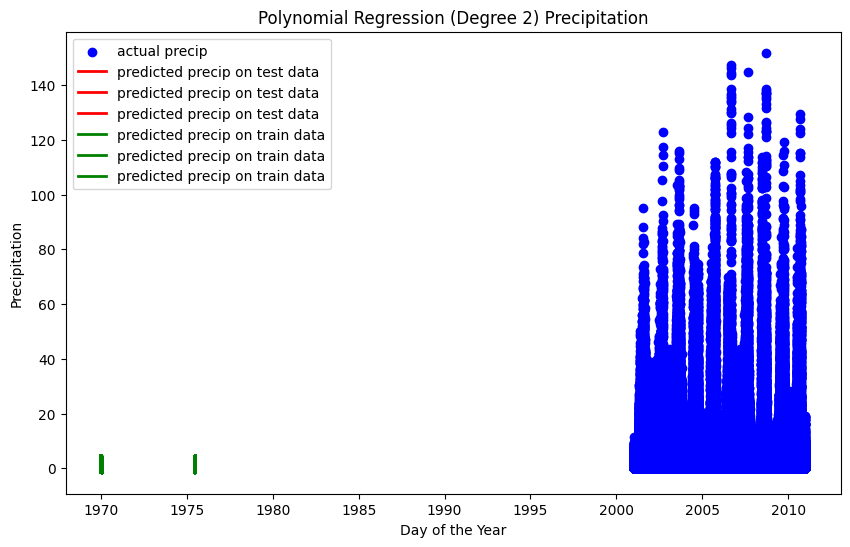

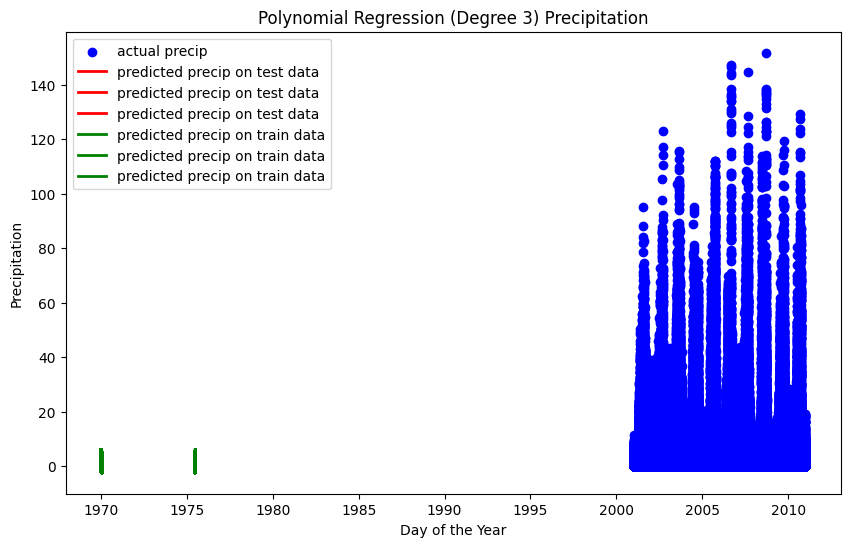

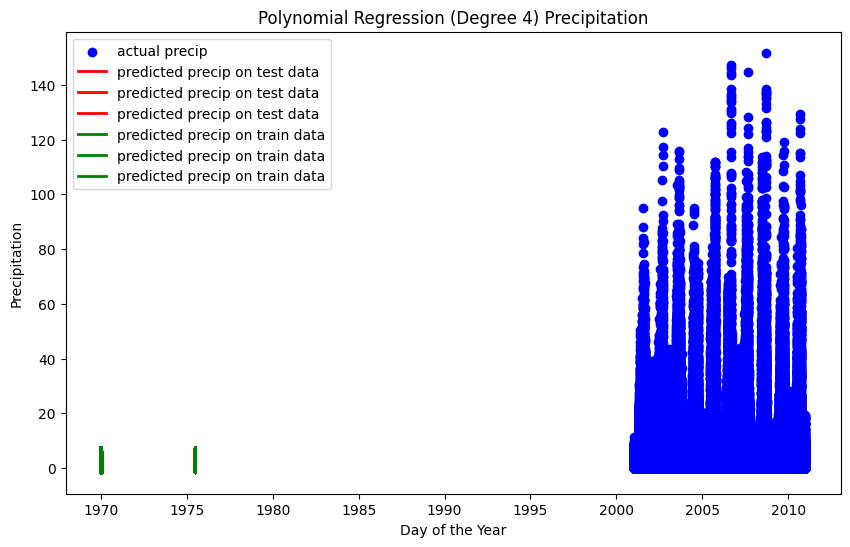

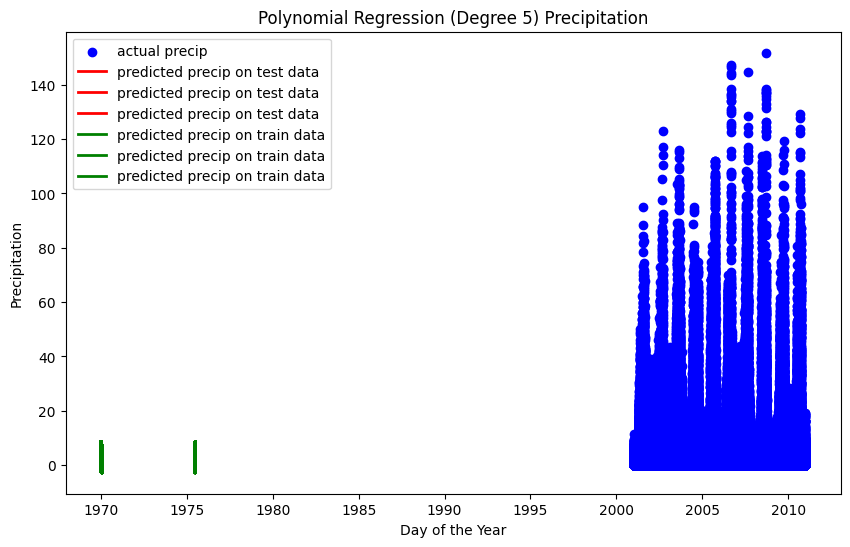

In [23]:
train_errors = []
test_errors = []

for degree in models:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    X_b = np.c_[np.ones((X_train_poly.shape[0], 1)), X_train_poly]
    X_b_test=np.c_[np.ones((X_test_poly.shape[0], 1)), X_test_poly]

    # Add lambda term
    lambda_ = 1e-5
    I = np.eye(X_b.shape[1])
    I[0, 0] = 0  # Do not regularize intercept term

    # Solve for theta using the regularized normal equation
    theta = np.linalg.inv(X_b.T.dot(X_b) + lambda_ * I).dot(X_b.T).dot(y_train)
    #theta_test=np.linalg.inv(X_b_test.T.dot(X_b_test) + lambda_ * I).dot(X_b_test.T).dot(y_test)

    # Make predictions
    y_pred_train = X_b.dot(theta)
    y_pred_test=X_b_test.dot(theta)
    
    # Sorting indices based on the first feature (datetime)
    #sorted_indices_train = np.argsort(X_train[:, 0])
    #sorted_indices_test = np.argsort(X_test[:, 0])
    #X_sorted_train = X_train[sorted_indices_train]
    #_sorted_test = X_test[sorted_indices_train]
    #y_pred_sorted_train = y_pred_train[sorted_indices_train]
    #y_pred_sorted_test = y_pred_test[sorted_indices_train]

    # Plot the data and regression curve
    plt.figure(figsize=(10, 6))
    plt.scatter(df['datetime'], y, color='blue', label='actual precip')  # Scatter plot of actual data
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='predicted precip on test data')
    plt.plot(X_train, y_pred_train, color='green', linewidth=2, label='predicted precip on train data')  # Regression curve
    plt.xlabel('Day of the Year')  # Assuming datetime is the day of the year
    plt.ylabel('Precipitation')
    plt.title(f'Polynomial Regression (Degree {degree}) Precipitation')
    plt.legend()
    plt.show()

    # Scatter plot of predicted vs actual values
    #plt.figure(figsize=(10, 6))
    #plt.scatter(y_pred_train, y_pred_test, color='blue', alpha=0.5)
    #plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    #plt.xlabel('Actual Precipitation')
    #plt.ylabel('Predicted Precipitation')
    #plt.title(f'Predicted vs Actual Precipitation (Degree {degree})')
    #plt.show()

    # Calculate and print performance metrics
    #mse = mean_squared_error(y_true=, y_pred=)
    #r2 = r2_score(y, y_pred)
    #print(f"Mean Squared Error (MSE): {mse}")
    #print(f"R-squared (R2): {r2}")
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))
    



